# Tutorial básico de pre-procesamiento de datos usando Pandas

 *Anthony Vega Padilla, 201258956*
 
 <br>
 <br>
 

Pandas es una biblioteca de código abierto que proporciona estructuras de datos de alto desempeño para análisis de datos utilizando Python, de hecho su nombre proviene de *Python Data Analysis Library*. La combinación de Pandas y otros paquetes como Numpy y Matplotlib brinda un poderoso conjunto de herramientas para procesar datos de una forma bastante intuitiva y eficiente.

Este tutorial únicamente cubre las operaciones básicas de manipulación de datos necesarias para hacer una primera exploración de un *dataset*, operaciones mas avanzadas pueden ser encontradas en el sitio web de Pandas, cuya documentación completa se puede consultar en **http://pandas.pydata.org/pandas-docs/stable/pandas.pdf**

## 1. Importar datos externos

Cuando el conjunto de datos es muy grande no resulta conveniente hacer el ingreso de forma manual, Pandas permite cargar archivos de datos externos de forma muy sencilla. En este caso particular se utilizará un archivo de extensón *csv* como ejemplo, pero archivos tipo *JSON*, *TSV* o bases de datos SQL son también soportados.

In [1]:
#import panda
import pandas as pd
import os

filename = "StudentsPerformance.csv"
dataset = pd.read_csv(filename)

dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


En este caso, se utiliza el *dataset* "Students Performance in Exams" disponible en **https://www.kaggle.com/spscientist/students-performance-in-exams**

Para cargar el archivo se usa la función *read_csv(path_to_file)* que recibe como argumento el nombre del archivo o la ruta completa en caso de que éste no se encuentre bajo el mismo directorio de trabajo.

La función *head()* permite mostrar la parte inicial de los datos en forma de tabla. Existen además otras opciones para mostrar los últimos elementos o algún rango en particular.

## 2. Visualizar datos

Para hacer una exploración inicial de los datos lo más eficiente es hacerlo de forma gráfica, de este modo se pueden encontrar algunas tendencias marcadas o bien, detectar valores atípicos en el conjunto de datos.

Se debe contar con el paquete *matplotlib* previamente instalado y activar el siguiente comando (conocidos como *magics*) para habilitar los gráficos

In [3]:
%matplotlib inline

Seguidamente se importa el módulo pyplot de la misma biblioteca. De este modo, podemos crear un gráfico directamente desde el *dataset* usando la función *plot()*

Por medio de "[index]" se puede utilizar algún índice que permita utilizar un rango específico de los datos y en los argumentos de la función *plot()* se define el tipo de gráfico y algunos parámetros configurables.

Text(0.5, 0, 'math score')

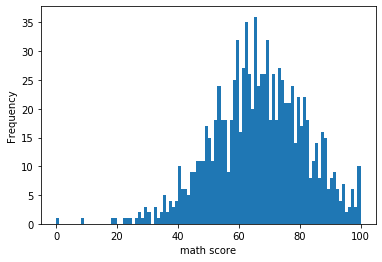

In [5]:
import matplotlib.pyplot as plt

dataset["math score"].plot(kind='hist', bins=100)
plt.xlabel('math score')

Text(0, 0.5, 'Mean math Score')

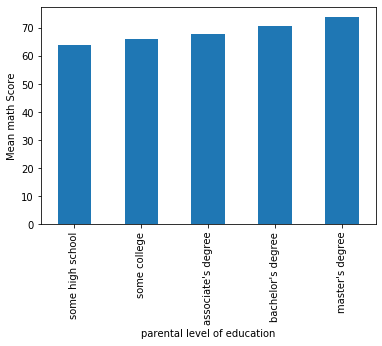

In [7]:
plot_data = dataset[dataset['test preparation course']=='none']
plot_data = plot_data.groupby('parental level of education')['reading score'].mean()
plot_data.sort_values()[-5:].plot(kind='bar')
plt.ylabel('Mean math Score')

En el primemr ejemplo se muestra un histograma con la distribución de frecuencias para la calificación del examen de matemáticas. Por otro lado en el segundo caso, un gráfico de barras donde aplican algunas funcionalidades útiles:

**a. Indexación condicional:** En lugar de usar un rango o etiqueta específica, se pueden seleccionar todas las instancias que cumplan con la condición indicada. En este caso, todos los que no hayan llevado un curso de preparación para el examen.

**b. Agrupación:** Es posible indicar los grupos o clases en los que se quieren dividir los datos según los detalles en que desea hacer énfasis. Se agrupan en este caso en función de la columna "nivel de educación de los padres" 

**c. Estadísticas de los datos:** Además de poder graficar todos los datos completos como en el ejemplo del histograma, se puede también calcular alguna estadística en particular y mostrar ese valor. Aquí se presenta la nota promedio.

**d. Ordenamiento:** Finalmente, las barras se ordenan de forma creciente de izquierda a derecha y se permite mostrar un máximo de 5 barras, esto lo indica el -5 que recibe como argumento la función *sort_values()*

## 3. Estadísticas de los datos

Múltiples operaciones pueden ser aplicadas sobre una serie de datos unidimensional, entre estas se pueden mencionar: suma, promedio, conteo, mediana, mínimo y máximo. Para esto únicamente se debe selecionar una columna de datos por medio del índice correspondiente, como se muestra a continuación.

In [9]:
[dataset['math score'].sum(),
dataset['math score'].max(),
dataset['math score'].mean()]

[66089, 100, 66.089]

Para series de datos no numéricos, se puede usar la función *describe()* que brinda la siguiente información.

In [14]:
dataset['parental level of education'].describe()

count             1000
unique               6
top       some college
freq               226
Name: parental level of education, dtype: object

Esta misma función cuando se utiliza seleccionando todo el *dataset* brinda un resumen general de las series numéricas.

In [13]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## 4. Modificar los datos

Existen casos donde al hacer un análisis exploratorio previo se determina que hay parte de los datos que realmente no aporta información útil o que se encuentra incompleta. 

Por ejemplo, para eliminar la información sobre el género de los estudiantes y el tipo de almuerzo se puede utilizar la función *drop()* pasando como argumento el nombre de la columna o el índice de su posición en el *dataset*. Esta función devuelve un conjunto de datos nuevo, por tanto se debe reasignar o utilizar una variable nueva.

In [18]:
new_dataset = dataset.drop(columns=['gender', 'lunch'])
new_dataset.head()

,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,group B,bachelor's degree,none,72,72,74
1,group C,some college,completed,69,90,88
2,group B,master's degree,none,90,95,93
3,group A,associate's degree,none,47,57,44
4,group C,some college,none,76,78,75


Para los casos donde hay información incompleta, se puede "completar" el *dataset* con algún valor por defecto o nulo, según el análisis requerido. Por ejemplo, los estudiantes cuya nota de matemáticas no aparezca se les asignará un 60.

In [20]:
filename = "StudentsPerformanceIncomplete.csv"
incomplete_dataset = pd.read_csv(filename)

incomplete_dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,NaN,72,74
1,female,group C,some college,standard,completed,69.0,90,88
2,female,group B,master's degree,standard,none,90.0,95,93
3,male,group A,associate's degree,free/reduced,none,NaN,57,44
4,male,group C,some college,standard,none,76.0,78,75


Se puede observar que las instancias 0 y 3 muestran NaN en el campo *math score* porque no tienen ningún valor. Usando la función *fillna()* se puede llevar a cabo el reemplazo de esos casos con un nuevo valor predefinido que se pasa como parámetro.

In [29]:
filled_dataset = incomplete_dataset.fillna(60)
filled_dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,60.0,72,74
1,female,group C,some college,standard,completed,69.0,90,88
2,female,group B,master's degree,standard,none,90.0,95,93
3,male,group A,associate's degree,free/reduced,none,60.0,57,44
4,male,group C,some college,standard,none,76.0,78,75


Finalmente, una de las operaciones más comunes y también de gran utilidad es el escalado y la normalización de datos. Esto se puede llevar a cabo con ayuda del paquete *scikitlearn*

Text(0.5, 0, 'Instances (student)')

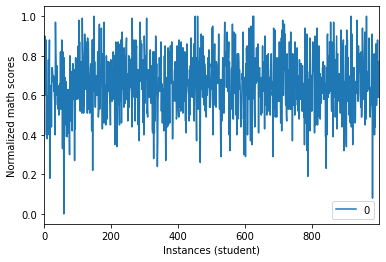

In [51]:
import numpy as np
from sklearn import preprocessing

df = pd.DataFrame(filled_dataset['math score'])

min_max = preprocessing.MinMaxScaler()
scaled = min_max.fit_transform(df)
df_scaled = pd.DataFrame(scaled)

df_scaled.plot()
plt.ylabel('Normalized math scores')
plt.xlabel('Instances (student)')

En este caso se extrae del *dataset* la serie de datos deseada y se coloca en un *DataFrame*. Seguidamente se crea el escalador, que contiene la información de los valores mínimos y máximos en la serie.
Utilizando el escalador, se ejecuta la función *fit_transform()* sobre el *DataFrame* que contiene la serie sin normalizar y el resultado se coloca en un nuevo *DataFrame*.
En el gráfico se puede observar como los resultados de la columna "math score" ahora varían en un rango de 0-1 como era esperado.